In [6]:
from sklearn.preprocessing import normalize
import numpy as np
import json
from XMeans import XMeansTraining
import ipyvolume as ipv
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.manifold import TSNE
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data

titleList = []
DocVecs = []

with open("./sampleData.json",'r') as f:
    for line in f:
        data = json.loads(line)
        titleList.append(data["title"])
        DocVecs.append(data["docvec"])

data = np.array(DocVecs)

In [3]:
# Train XMeans

maxBranching = 5
Centroids,Labels = XMeansTraining(data,maxBranching)
print("Number of clusters = {}".format(len(Centroids)))

Number of clusters = 26


In [12]:
# Save Cluster titles at ./Clusters

for clID in range(len(Centroids)):
    indices = np.where(Labels == clID)[0].tolist()
    Titles = [titleList[i] for i in indices]
    with open("./Clusters/"+str(clID)+".txt", 'a') as file:
        for title in Titles:
            file.write("%s\n" % title)

### Visualize cluster samples

In [4]:
# Dimensionality reduction using tSNE

tSNE = TSNE(n_components=3,metric='cosine')
tsneModel = tSNE.fit(data)

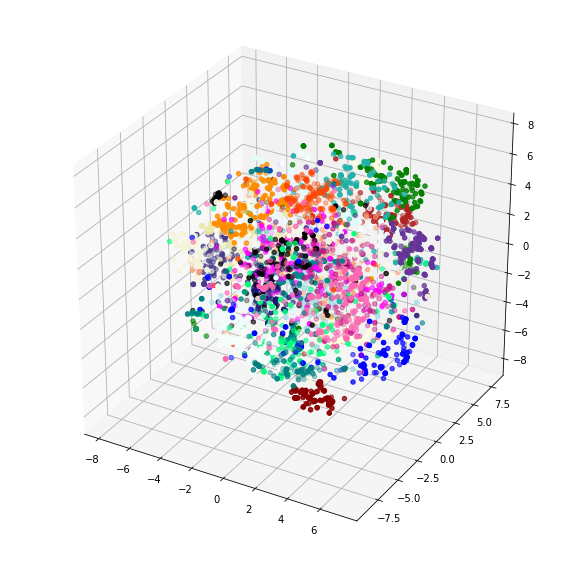

In [12]:
# 3D scatter plot of samples from clusters

noSamples = 200
tSNEData = tsneModel.embedding_
colors = [col for col in mcolors.CSS4_COLORS.keys()]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for k in np.arange(len(Centroids)):
    ind = np.where(Labels == k)[0].tolist()
    indices = random.sample(ind, noSamples)
    ax.scatter(tSNEData[indices,0], tSNEData[indices,1], tSNEData[indices,2], marker="o",color=colors[k])


ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

plt.show()

In [13]:
# 3D interactive scatter plot of samples from clusters


size = 0.75
for k in np.arange(len(Centroids)):
    ind = np.where(Labels == k)[0].tolist()
    indices = random.sample(ind, noSamples)
    ipv.pylab.scatter(tSNEData[indices,0], tSNEData[indices,1], tSNEData[indices,2], size=size, marker="sphere",color=colors[k+2])

ipv.pylab.show()
ipv.pylab.xlabel("")
ipv.pylab.ylabel("")
ipv.pylab.zlabel("")
ipv.pylab.xyzlim(-20)

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color=array('rebeccapurple',
      dtype='<U13'), color_selected=array('white',
      dtype='<U5'), geo='sphere', size=array(0.75), size_selected=array(2.6), x=array([-5.79909266, -5.45822195, -6.4584461 , -6.37999355, -6.26574979,
       -6.57468845, -6.23074051, -7.20667167,  0.3620527 , -6.36459132,
       -6.09455402, -6.50357457, -6.65754611, -4.23366513, -6.62899268,
       -6.58758231, -5.48192063, -6.48397873,  4.08525858, -6.65903092,
       -6.94015104, -1.63219965, -6.63294103, -6.46449827, -6.58629463,
       -5.44946284, -6.11341257, -6.23915919, -5.43779787, -6.37735075,
       -6.68109982, -6.45377984, -6.62653722, -7.21882457, -5.46213621,
       -7.02398982, -4.24341194, -7.2920299 , -6.6770541 , -6.5313039 ,
       -7.59027928, -6.31238876, -6.67501936, -3.6750209 , -3.71951185,
       -3.72532258, -6.67480837, -7.28637041, -6.2189974 , -7.57783115,
       -5.48235651, -5.90837524, -6.3781801 , -7.01510287, -6.65739196,
       -7.28456677, -6.32342636, -7.20553185, -7.83768264, -6.38245836,
       -6.58208526, -6.62787678, -7.2953064 , -6.69731934, -6.39536082,
       -7.33971376, -6.55744774, -6.10491014, -6.69385951, -6.87130022,
       -6.46212842, -3.24216389, -6.74852497, -5.79482035, -6.65183598,
       -6.4457738 , -6.58686757, -3.56033183, -6.68080403, -7.06084804,
       -6.55403679, -7.29031622, -6.47964406, -6.32110381, -5.47457469,
       -6.13597642, -6.46620398, -7.32812354, -5.79353246, -5.42547092,
       -6.86988645, -6.48032773, -6.48198234, -7.83585739, -6.36643781,
       -7.28812201, -7.28618327, -6.96422246, -5.90521123, -6.59407194,
       -1.63281233, -7.22335411, -5.90517876, -6.52002282, -6.72823584,
        5.17324678, -6.11660675, -6.61281957, -3.07444047, -6.58229354,
       -6.3821647 , -7.209719  , -6.88172027, -6.88852381, -6.98087402,
       -6.60866624, -6.55710707, -6.58512079, -6.34930237, -6.47719539,
       -6.18028895, -2.83495932, -3.22133894, -6.62875131, -6.62910453,
       -6.6751334 , -5.54971057, -6.65111736, -5.89887605, -6.38419272,
       -7.47549467, -6.50300043, -6.1810152 , -6.41742651, -3.20825986,
       -6.21862816, -6.47463466, -7.16776057, -6.49413326, -6.47233387,
       -6.93690191, -3.07573353, -6.56471172, -6.31289089, -7.20456753,
       -6.59385084, -6.58571548, -7.59074854, -6.46323634, -6.6681444 ,
       -7.8331054 , -3.72634989, -6.67982053, -7.37123037, -6.64870401,
       -6.3655117 , -6.44797952, -6.76651275, -7.20965807, -3.21641093,
       -6.67545763, -6.15878491, -6.59917936, -6.98935235, -5.78426567,
       -6.67902846, -6.83382708, -6.24716142, -7.58739712, -7.83785098,
       -6.07575603, -6.6749634 , -5.86158547, -6.54011813, -3.07361449,
       -6.10786894, -6.61655293, -7.21348563, -6.36520213, -6.43835678,
       -7.31103494, -6.55767413, -6.0639098 , -6.62800062, -6.63660703,
       -3.15386329, -6.47014832, -5.86217698, -6.63288411, -6.99020179,
       -6.55672656, -6.60052116, -6.52528564, -3.55580514, -3.68182679,
       -6.98313083, -6.67883416, -6.9964933 , -3.21603106, -6.58138149]), y=array([  9.11242393e-01,   1.00240856e+00,   2.01172403e+00,
         1.77173518e+00,   5.45968824e-01,   2.49607378e+00,
         1.35832262e-01,   2.60300890e+00,   2.76101307e+00,
         2.97127924e+00,   1.67911132e-01,   1.42400116e+00,
         7.87748206e-01,   7.49495130e-01,   2.47207685e+00,
         2.49257117e+00,   2.02287751e+00,   1.18588551e+00,
         1.16591506e+00,   7.96040551e-01,   1.32111047e+00,
        -6.69746391e+00,   2.49424490e+00,   2.00120499e+00,
         6.66810965e-01,   9.95716231e-01,   2.20913369e-01,
        -3.33772148e-01,   3.64242394e-01,   1.76709716e+00,
         2.35628983e+00,   2.02819782e+00,   2.46470339e+00,
       